# Homework 4: Visualizing Monetary Policy
## ECON 611 | Drew Sandberg

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import json

## Dictionary Pro Tips:
1. INDEX = row names
2. KEYS = column names
3. VALUES = individual values at row/column intersection

In [2]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj, rounding_digit = 1):
    n = len(list_obj)
    mean_ = round(total(list_obj) / n, rounding_digit)
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, rounding_digit = 1, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = round(sum_sq_diff / n, rounding_digit)
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = round(sum_sq_diff / (n - 1), rounding_digit)
    
    return variance_

def SD(list_obj, rounding_digit = 1, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, rounding_digit, sample) ** (1/2)
    
    return round(SD_, rounding_digit)

def covariance(list_obj1, list_obj2, rounding_digit = 3, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return round(cov,rounding_digit)
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, rounding_digit = 1, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
    skew = round(skew,rounding_digit)
        
    return skew

def kurtosis(list_obj, rounding_digit = 1, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    kurt = round(kurt,rounding_digit)
    
    return kurt

def drew_rando(mu, sigma, length =10, rounding_digit=1):
    samples = np.random.normal(mu, sigma, length).tolist()
    for i in range(len(samples)):
        samples[i] = round(samples[i],rounding_digit)
    
    return samples

### Using functions in print statements...
Added a silly function to generate a list of random numbers, then print out the statistics from your lists of randomly generated numbers.

In [3]:
items = 12
mu = 2.3
sigma = 3.4

# First list we'll use numpy random integer...
list = np.random.randint(1,100,items).tolist()

#Second list we'll use the function to generate floats from a specific distribution
second_list = drew_rando(mu, sigma, items, 2)

print("First list:",list, "Second List:", second_list)

First list: [10, 65, 59, 47, 4, 26, 83, 71, 11, 5, 56, 38] Second List: [6.22, 9.78, 2.81, 3.28, 0.87, 3.79, 5.75, 0.8, 5.48, -2.62, 4.64, 5.33]


### Print Statistics from Randomly Generated Lists of Numbers

In [4]:
print("Total of list:", total(list))
print("Total of second list:", total(second_list))
print("Mean of second list", mean(second_list,3))
print("List Median:", median(list), " | Second List Median:", median(second_list))
print("Variance", variance(list, 1, sample=False))
print("Variance (sample):", variance(list, 3, sample=True))
print("SD:", SD(list, 2, sample = False))
print("SD (sample)", SD(list, 3, sample=True))
print("Covariance", covariance(list, second_list, 3, sample=False))
print("Covariance of sample", covariance(list, second_list, 4, sample=True))
print("Skewness", skewness(second_list, sample=False))
print("Skewness (sample)", skewness(second_list, 2, sample=True))
print("Kurtosis", kurtosis(second_list, 3, sample=False))


Total of list: 475
Total of second list: 46.13
Mean of second list 3.844
List Median: 42.5  | Second List Median: 4.2
Variance 713.4
Variance (sample): 778.265
SD: 26.71
SD (sample) 27.897
Covariance 28.124
Covariance of sample 30.6811
Skewness -0.2
Skewness (sample) -0.3
Kurtosis 3.288


In [5]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["Mean"]     = mean(val,3)
        dct[key]["Median"]   = round(median(val),3)
        dct[key]["Variance"] = variance(val, 2, sample)
        dct[key]["SD"]       = SD(val, 2, sample) 
        dct[key]["Skewness"] = skewness(val, 1, sample)
        dct[key]["Kurtosis"] = kurtosis(val, 1, sample)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [6]:
#!pip install pandas_datareader

## Stock Selection

I've chosen stocks from the renewable utilities industry within the utilities sectors. Most companies I've selected are considered mid and large cap stocks.

- [AQN](https://www.msn.com/en-us/money/stockdetails/fi-a1nnk2)
- [AY](https://www.msn.com/en-us/money/stockdetails/fi-aw1wu2)
- [BEP](https://www.msn.com/en-us/money/stockdetails/fi-a1odjc)
- [CWEN](https://www.msn.com/en-us/money/stockdetails/fi-a1yz27)
- [NEP](https://www.msn.com/en-us/money/stockdetails/fi-a1yeyc)
- [NPIFF](https://www.msn.com/en-us/money/stockdetails/fi-a2q7fr)
- [ORA](https://www.msn.com/en-us/money/stockdetails/fi-a1zaz2)
- [TRSWF](https://www.msn.com/en-us/money/stockdetails/fi-a2yyp2)
- [XEL](https://www.msn.com/en-us/money/stockdetails/fi-ay4lu2)


## Getting Stock Data
Importing from file rather than reloading from Yahoo!
Rather than re-downloading the data, converting from data dictionary to pandas again...
I'll just skip the data dictionary stuff, and write/read as pandas dataframe.

In [7]:
# # This code has been commented out as I've already ran the data once and 
# # written the data to file.

# start = datetime.datetime(2018, 1, 1)
# end = datetime.datetime.today()

# data_dict = {}
# stocks = ['AQN', 'AY', 'BEP', 'CWEN', 'NEP', 'NPIFF', 'ORA', 'TRSWF', 'XEL']

# for stock in stocks:
#     data_dict[stock] = web.DataReader(stock, 'yahoo', start, end)

In [8]:
#data_dict

In [9]:
#data_dict[stock]

In [10]:
#print(data_dict)

In [11]:
#print("KEYS:", data_dict.keys())

In [12]:
#data_dict.values()

In [13]:
# stock_close = pd.concat([df["Close"] for df in data_dict.values()], 
#                         axis=1,
#                         keys = data_dict.keys())

In [14]:
# # Write dataframe to file
# stock_close.to_csv('../data/stock_homework.csv')

In [15]:
# Read csv from file to pandas dataframe...
stock_close = pd.read_csv('../data/stock_homework.csv')

#Reset index to Date ... reading in from CSV seems to lose the index data?
stock_close.set_index('Date', inplace=True)

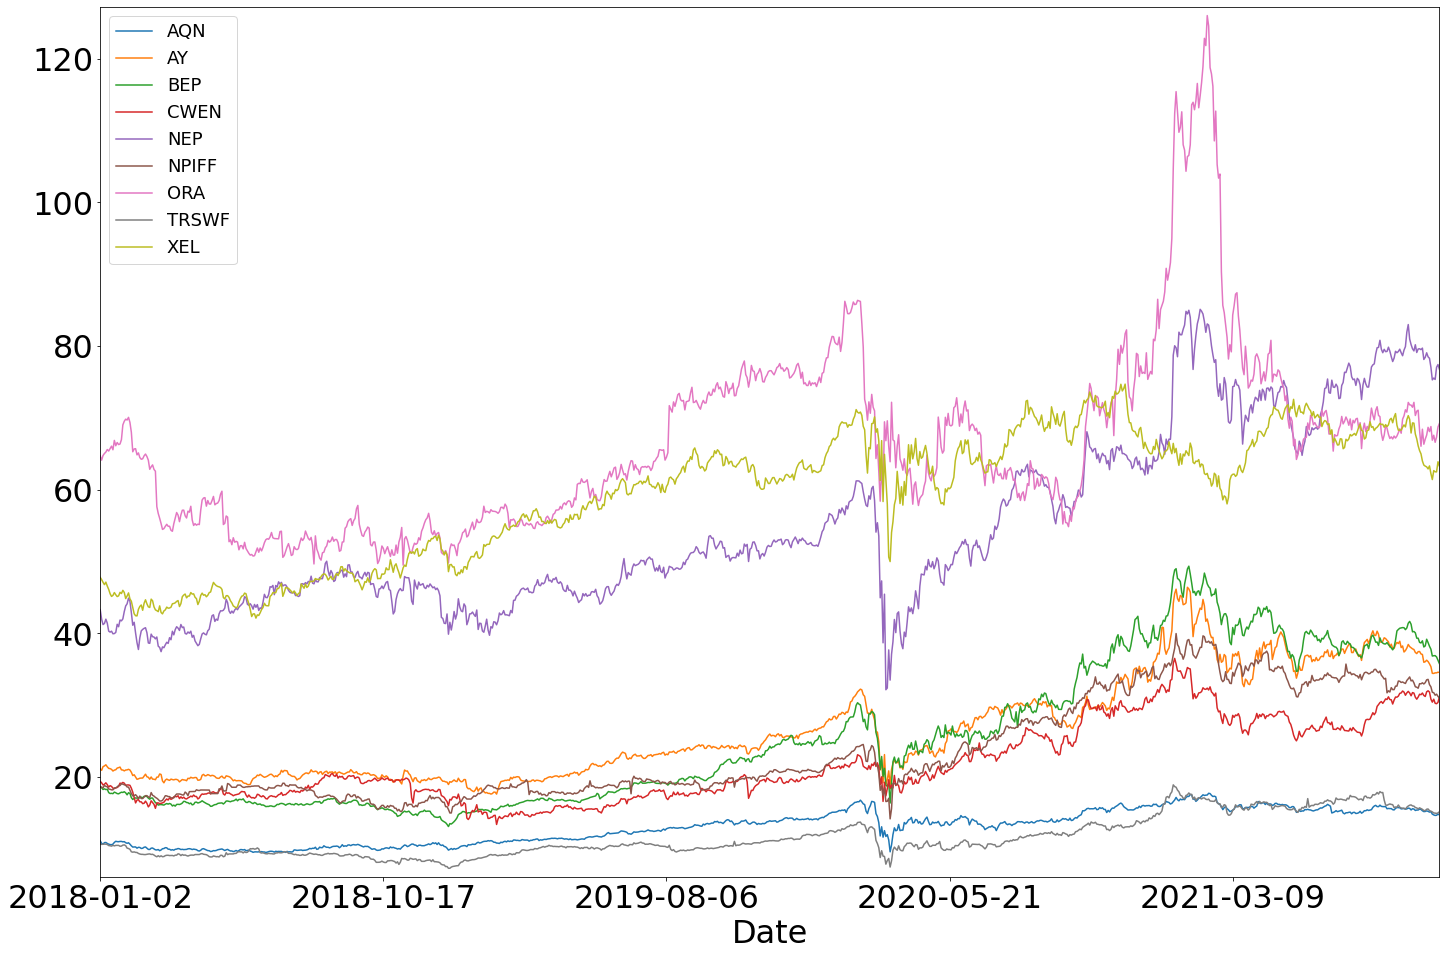

In [16]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

fig, ax = plt.subplots(figsize = (24,16))
for key in stock_close:
    stock_close[key].plot.line(ax=ax, legend=True)

# Changing the size of the legend as to not mask the lines.
plt.legend(loc=2, prop={'size':18})

#### Pro Tip:
To view companre value change in terms of propotion, log the y axis

## Visualizing Stock Close as Line Graphs

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/1999560305.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$" + str(int(y)) if y >= 1 else round(y,1) for y in y_vals])


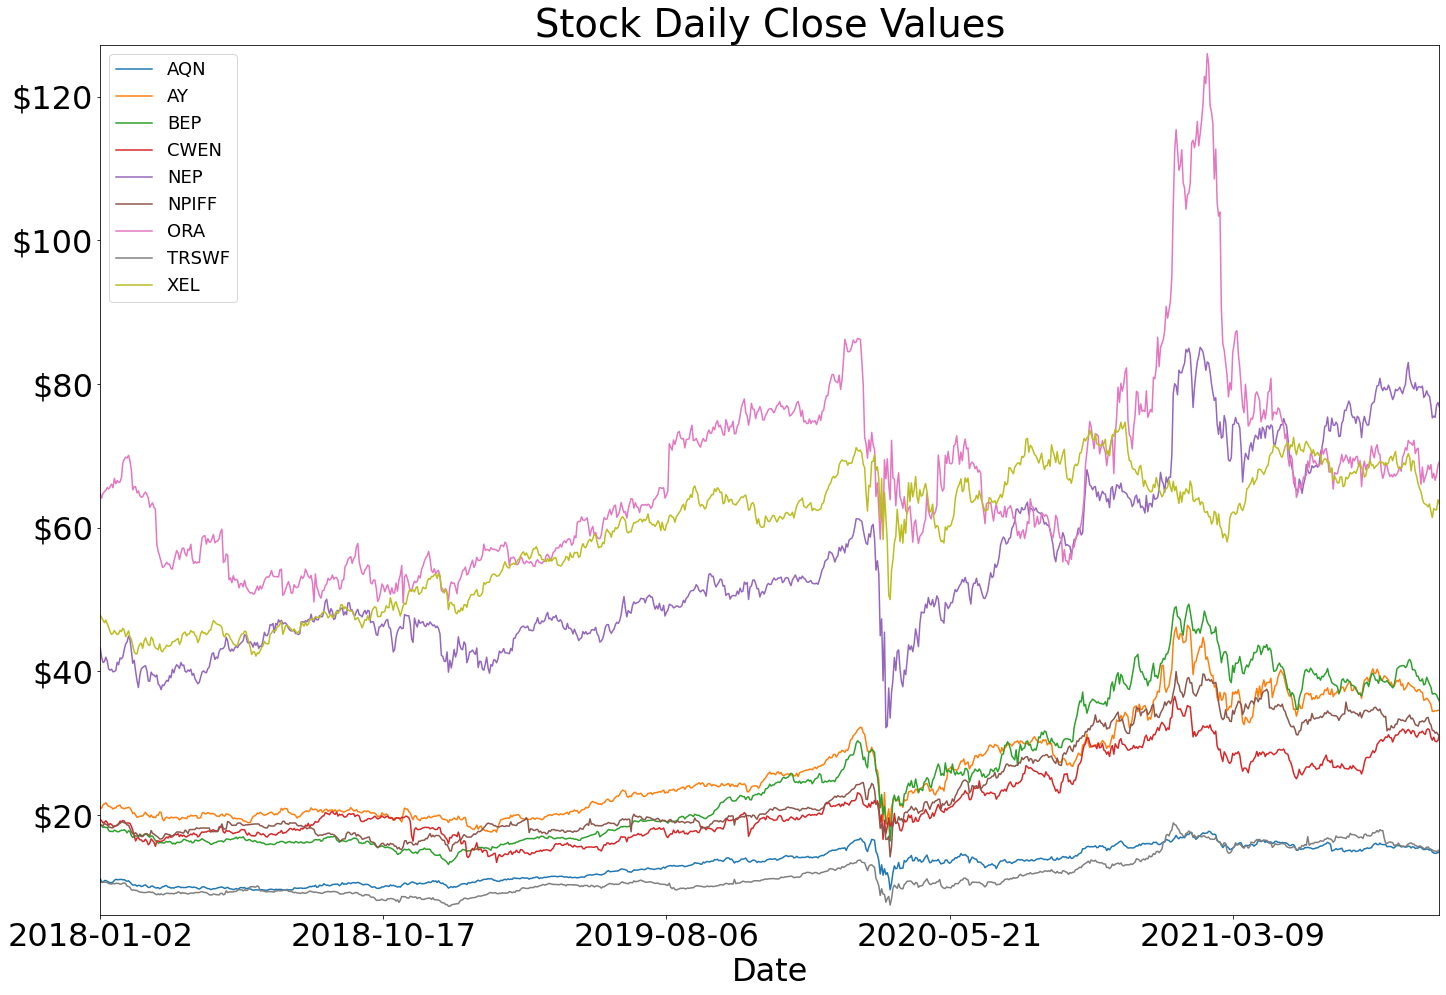

In [17]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

fig, ax = plt.subplots(figsize = (24,16))
stock_close.plot.line(ax=ax, legend=True)
#ax.set_yscale("log")
y_vals = ax.get_yticks()

ax.set_yticklabels(["$" + str(int(y)) if y >= 1 else round(y,1) for y in y_vals])

plt.title("Stock Daily Close Values")

# Changing the size of the legend as to not mask the lines.
plt.legend(loc=2, prop={'size':18})

## Visualing Rate of Chane in Stock Closing

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/3176821130.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["$" + str(int(y)) if y >= 1 else round(y,1) for y in y_vals])


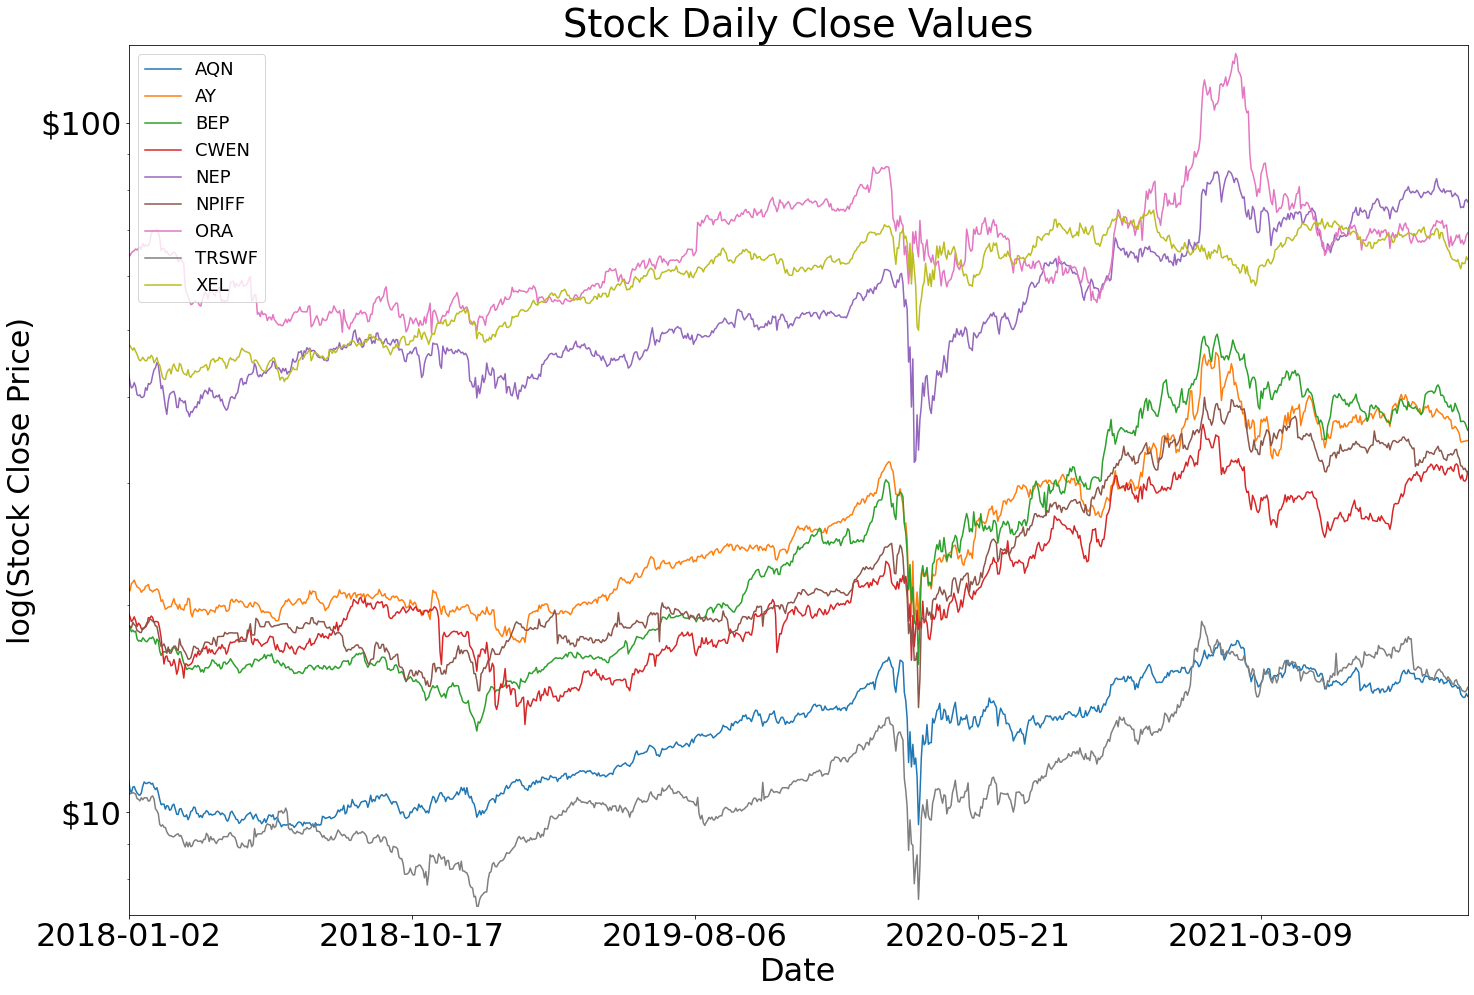

In [18]:
plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

fig, ax = plt.subplots(figsize = (24,16))
stock_close.plot.line(ax=ax, legend=True)
ax.set_yscale("log")

y_vals = ax.get_yticks()
ax.set_yticklabels(["$" + str(int(y)) if y >= 1 else round(y,1) for y in y_vals])



plt.title("Stock Daily Close Values")
ax.set_ylabel("log(Stock Close Price)", size = 30, color = "black")

plt.legend(loc=2, prop={'size':18})

In [19]:
price_change_data = stock_close.pct_change() * 100

### Scatter Plot: Daily Price Change

Note the wide dispersion of daily price changes at the start of the COVID-19 pandemic (circa March 2020). Also note that since the pandemic, the energy stocks seem to be fairly volative given the appearance of more extreme values post March 2020 as opposed to the 6 to 12 months prior to March 2020.

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/2990599919.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


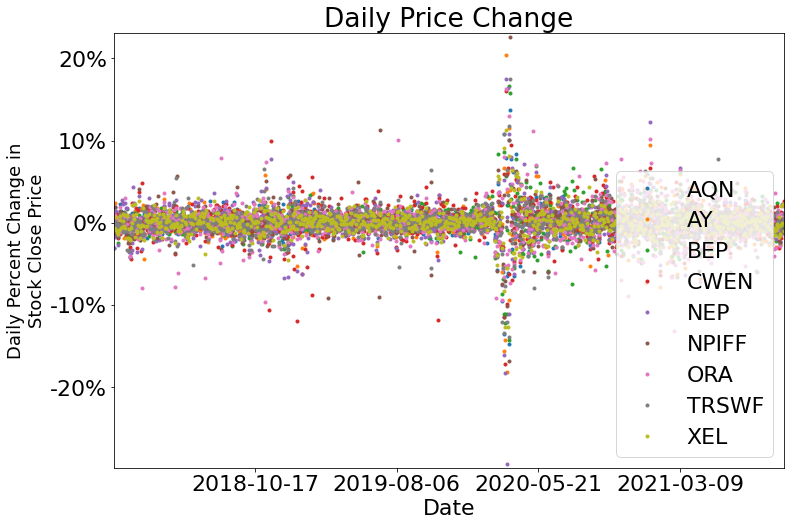

In [20]:
#Do the price change stuff...
# set default font size
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (12,8))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")

# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    
ax.set_ylabel("Daily Percent Change in\nStock Close Price", size = 18, color = "black")

plt.legend(loc= "lower right", prop={'size':22})



In [21]:
stats_df = gather_statistics(price_change_data, sample=True)
stats_df

,AQN,AY,BEP,CWEN,NEP,NPIFF,ORA,TRSWF,XEL
Mean,0.044,0.073,0.089,0.074,0.09,0.074,0.034,0.056,0.042
Median,0.100,0.100,0.100,0.100,0.00,0.000,0.100,0.000,0.100
Variance,2.890,4.240,4.060,4.610,5.68,3.950,5.390,3.860,2.460
SD,1.700,2.060,2.010,2.150,2.38,1.990,2.320,1.960,1.570
Skewness,-0.600,-0.500,0.200,-0.800,-1.80,0.600,0.300,-0.200,-0.400
Kurtosis,21.800,27.500,16.200,13.500,35.10,26.500,7.600,16.000,13.500


## Playing around with axis labels

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/2925164490.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/2925164490.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in y_vals], fontsize = 16)


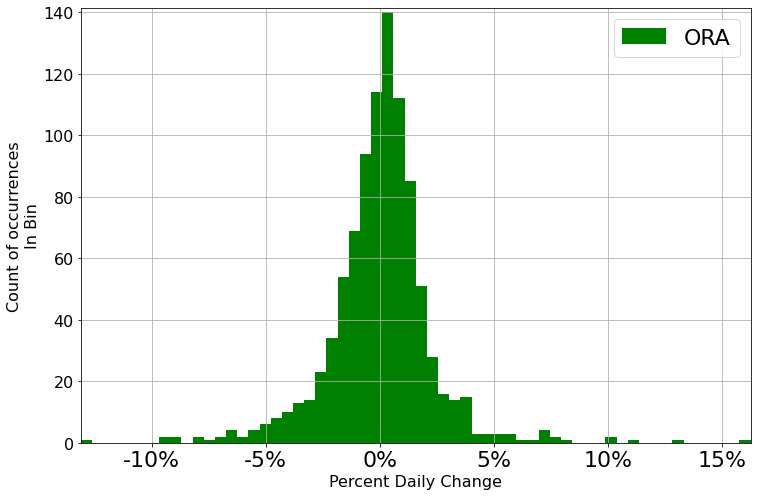

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
price_change_data["ORA"].hist(bins=60, label="ORA", color = "green")

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
ax.set_xlabel("Percent Daily Change", size = 16, color = "black")

y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) for y in y_vals], fontsize = 16)
ax.set_ylabel("Count of occurrences\nIn Bin", size = 16, color = "black")

plt.legend()
plt.show()

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/789447447.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals], size = 14)
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/789447447.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y*100)) + "%" for y in y_vals], size =14)


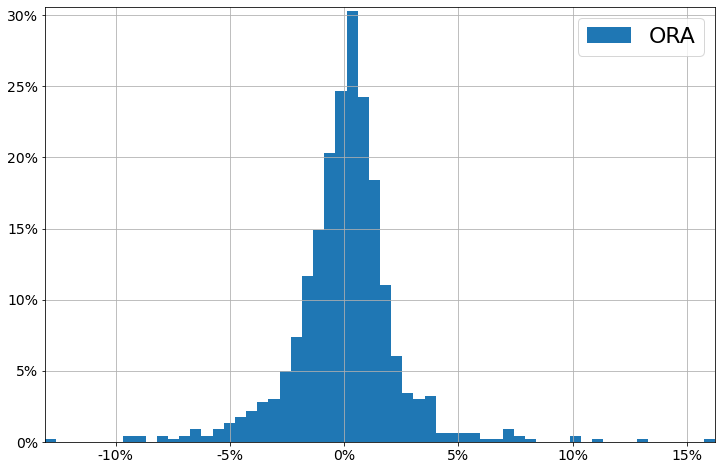

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
price_change_data["ORA"].hist(bins=60, label="ORA", density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals], size = 14)

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y*100)) + "%" for y in y_vals], size =14)

plt.legend()
plt.show()

array([[<AxesSubplot:title={'center':'AQN'}>,
        <AxesSubplot:title={'center':'AY'}>,
        <AxesSubplot:title={'center':'BEP'}>],
       [<AxesSubplot:title={'center':'CWEN'}>,
        <AxesSubplot:title={'center':'NEP'}>,
        <AxesSubplot:title={'center':'NPIFF'}>],
       [<AxesSubplot:title={'center':'ORA'}>,
        <AxesSubplot:title={'center':'TRSWF'}>,
        <AxesSubplot:title={'center':'XEL'}>]], dtype=object)

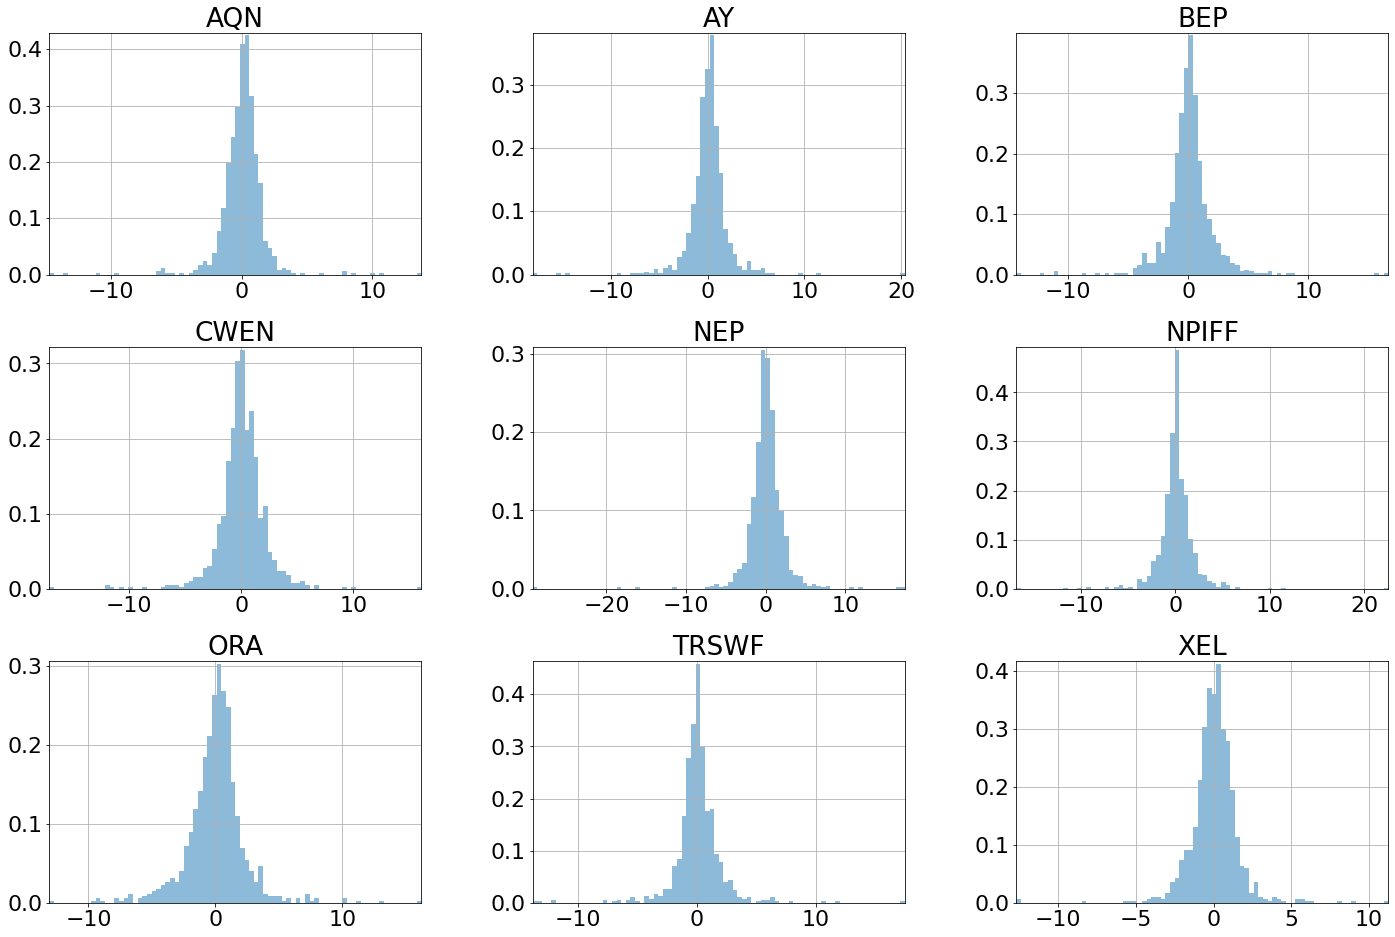

In [24]:
fig, ax = plt.subplots(3,3, figsize = (24,16))
price_change_data.hist(bins=80, alpha=0.5, density=True, ax=ax)

## Fix the axis labels for each plot

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/396040305.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+ "%" for x in x_vals])
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/396040305.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


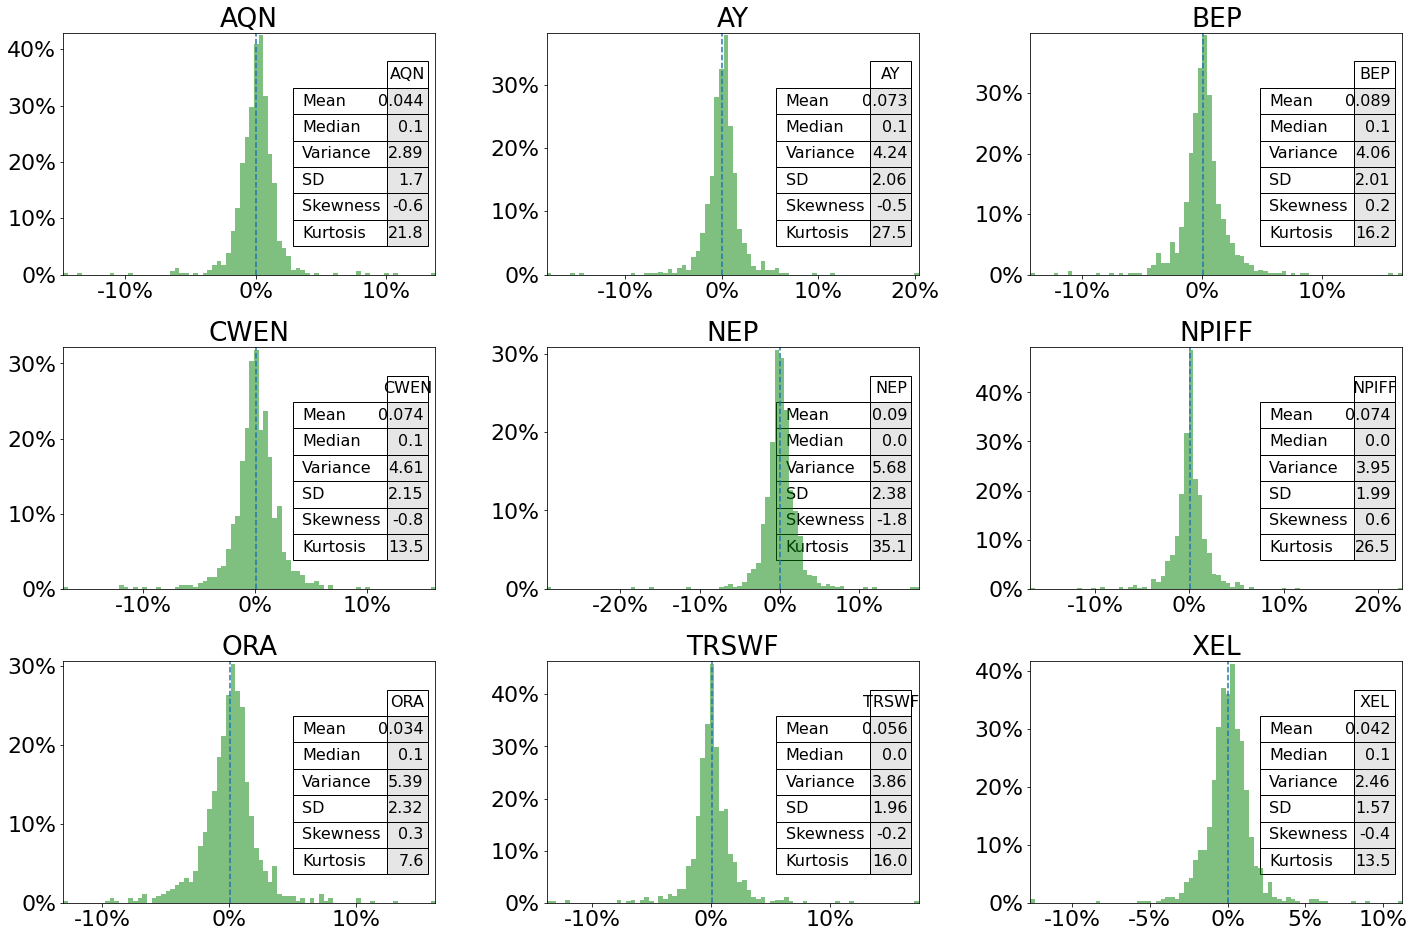

In [25]:
from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (24,16))
price_change_data.hist(bins=80, 
                       alpha=0.5, 
                       density=True, 
                       label = price_change_data.keys(),
                       ax=ax, 
                       color = "green")

# for i in range(len(ax)):
#     for j in range(len(ax[i])):
#         # select hist plot for each stock
#         a = ax[i][j]
        
# plot table with summary statistics
for row in range(len(ax)):
    for column in range(len(ax[row])):
        a = ax[row][column]
        
        # identify stock
        stock = a.get_title()
        
        # save summary statistics data
        hist_data = stats_df[stock] 
        
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.1,2.2)
        stats.auto_set_font_size(False)
        stats.set_fontsize(16)
        
        # mark the mean
        a.axvline(x = hist_data.loc["Mean"], ls="--")
        
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        
        # Turn of grid lines
        a.grid(False)

   
plt.show()

## Interpreting Historgrams (Above Cell)

### Mean
A positive mean indicates that that the daily percent change, on average, is a gain in value. Negative mean indicates, on average, the daily stock closing loses value.

### Median
Median indicates the center-point in the distribution where half of the values are greater and half of the values are less than. Medians greater than zero indicate more than half of the daily closes are positive gains for the stock.

### Variance
Variance indicates the dispersion of values around the median. Higher variance indicates the daily close values are spread further from the median. Variance in XCEL Energy (XEL) stock closing price of 2.46 is one of the lower variance values in this set of stocks; XCEL's daily stock close tends not to drift too far from the long-term average (mean).

### SD (Standard Deviation)
Standard deviation is another measure of dispersion of the data. +/- 1.96 standard deviations should cover 95% of all data values in the distribution.

### Skewness
A positive skewness number indicates more of the distrubtion is on the right side of mean; negative skewless indicates more is on the left side of the mean. Generally, in this context, positive skewness means more positive daily close results.

### Kurtosis
Kurtosis indicates "fat tails"; higher kurtosis values, in this context, indicates a potential investor would likely see extreme percent change in daily close values. A higher kurtosis, along with a positive skewness, and a positive mean would seem to indicate an investor should expect more extreme positive returns. Conversely, lower kurtosis numbers and lower variance numbers indicate lower frequency of extreme daily percent change values and well as daily percent change values that are closer to the mean (average).

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/2677871327.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/2677871327.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


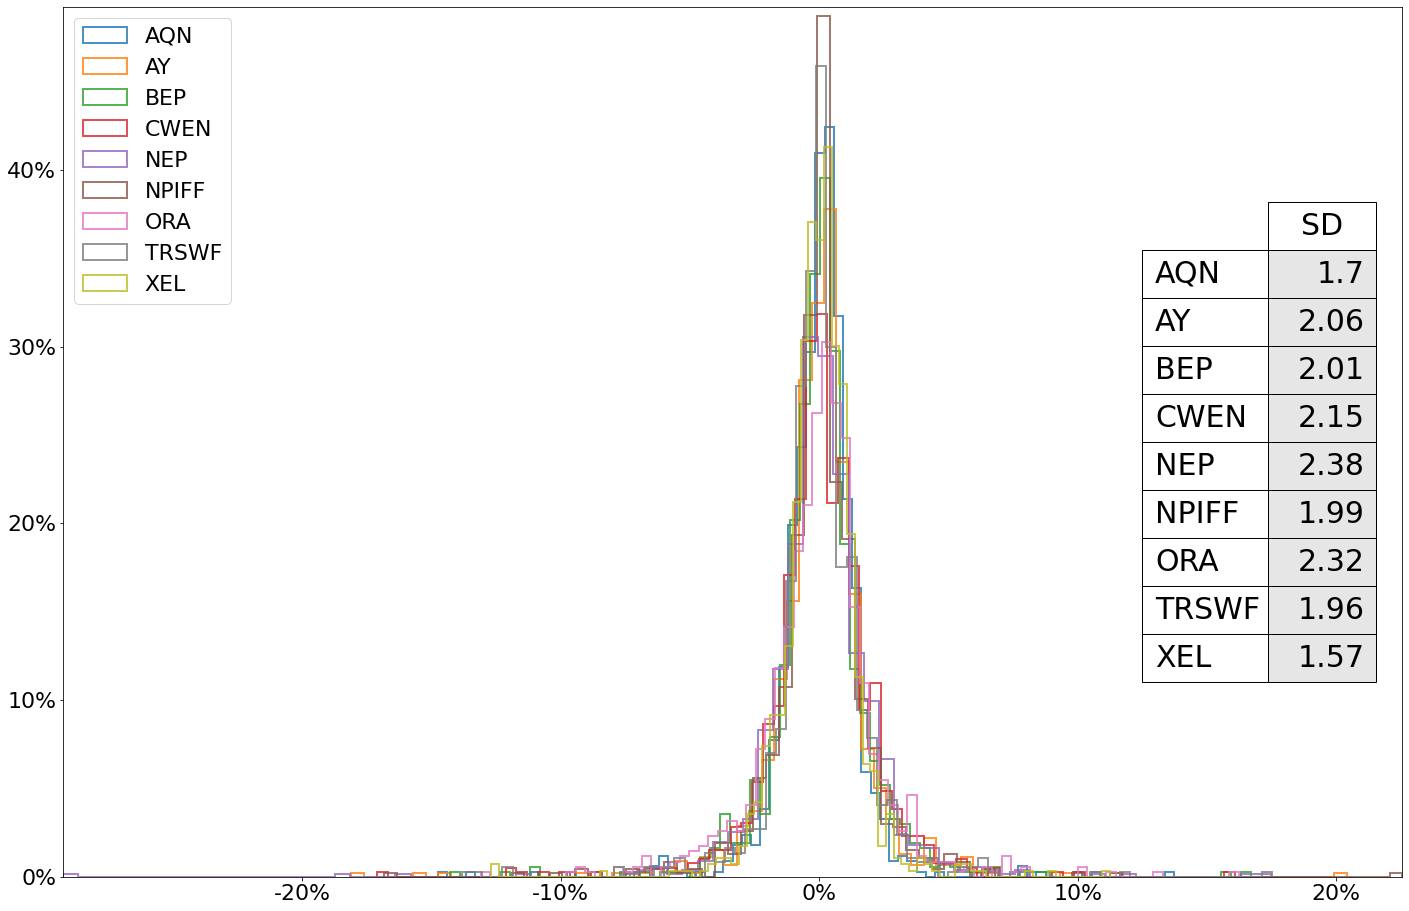

In [26]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 80
                                , histtype = "step"
                                , alpha = .8
                                , label = key
                                , linewidth = 2
                                , density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

# Include a table with the standard deviation of each stock
stats =table(ax
             , stats_df.loc["SD"]
             , colWidths=[.1]
             , cellColours=[[(.9,.9,.9)]] * 9, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 40
                                , alpha = .4
                                , label = key
                                , linewidth = 2
                                , density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

# Include a table with the standard deviation of each stock
stats =table(ax
             , stats_df.loc["SD"]
             , colWidths=[.1]
             , cellColours=[[(.9,.9,.9)]] * 9, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend(loc=2)

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/369348455.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
C:\Users\SAND8464\AppData\Local\Temp/ipykernel_22540/369348455.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
